# Linear Regression

## Importing the libraries

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Importing the dataset

In [211]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Inquiry

In [212]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML Datasets/50_Startups.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [213]:
dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


### I/O Separation

In [214]:
dataset = np.array(dataset)
x = dataset[:,:-1]
y = dataset[:,4:]

## Taking care of missing data

## Encoding categorical data

### Encoding the Independent Variable

In [215]:
le = LabelEncoder()
x[:,3] = le.fit_transform(x[:,3])
x

array([[165349.2, 136897.8, 471784.1, 2],
       [162597.7, 151377.59, 443898.53, 0],
       [153441.51, 101145.55, 407934.54, 1],
       [144372.41, 118671.85, 383199.62, 2],
       [142107.34, 91391.77, 366168.42, 1],
       [131876.9, 99814.71, 362861.36, 2],
       [134615.46, 147198.87, 127716.82, 0],
       [130298.13, 145530.06, 323876.68, 1],
       [120542.52, 148718.95, 311613.29, 2],
       [123334.88, 108679.17, 304981.62, 0],
       [101913.08, 110594.11, 229160.95, 1],
       [100671.96, 91790.61, 249744.55, 0],
       [93863.75, 127320.38, 249839.44, 1],
       [91992.39, 135495.07, 252664.93, 0],
       [119943.24, 156547.42, 256512.92, 1],
       [114523.61, 122616.84, 261776.23, 2],
       [78013.11, 121597.55, 264346.06, 0],
       [94657.16, 145077.58, 282574.31, 2],
       [91749.16, 114175.79, 294919.57, 1],
       [86419.7, 153514.11, 0.0, 2],
       [76253.86, 113867.3, 298664.47, 0],
       [78389.47, 153773.43, 299737.29, 2],
       [73994.56, 122782.75, 30331

In [216]:
# encoding city column like Sparse matrix 
# city = pd.get_dummies(x[:,-1]).values
# city = np.array(city)
# x = np.delete(x,3,1)
# print(city)

### Merge Independent Variable

In [217]:
# print(type(x))
# print(type(city))
# x = np.concatenate((x,city),1)
# print(x)

### Encoding the Dependent Variable

## Splitting the dataset into the Training set and Test set

In [218]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# print(x_train)
# print(x_test)

## Run Any of Four Option Below 
Only run one of them to get the result. As these procedure slices the dataset to single column.

> Proceed with column  **R&D Spend**




In [219]:
x_train = x_train[:,[0]]
x_test = x_test[:,[0]]
col_name = "R&D Spend"

> Proceed with column  **Administration**

In [205]:
x_train = x_train[:, [1]]
x_test = x_test[:, [1]]
col_name = "Administration"

> Proceed with column  **Marketing Spend**

In [154]:
x_train = x_train[:,[2]]
x_test = x_test[:,[2]]
col_name = "Marketing Spend"

> Proceed with column  **State**

In [192]:
x_train = x_train[:, [3]]
x_test = x_test[:,[3]]
col_name = "State"

## Feature Scaling

## Training the Linear regression model with the training data

In [220]:
regressor = LinearRegression()
# print(np.shape(x_train))
# print(np.shape(y_train))
regressor.fit(x_train, y_train)
# print(x_train)
# print(y_train)

LinearRegression()

## Predict test set result

In [221]:
y_pred = regressor.predict(x_test)

##Making the Confusion Matrix

## Visualise the training set result

### Matplotlib

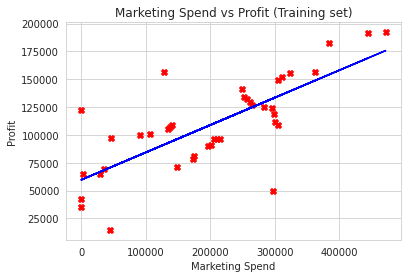

In [157]:
plt.scatter(x_train.reshape(-1), y_train.reshape(-1), marker='X',color='red')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title(col_name+' vs Profit (Training set)')
plt.xlabel(col_name)
plt.ylabel('Profit')
plt.show()

### Plotting Using Seaborn

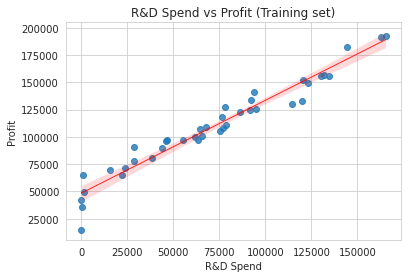

In [222]:
df = np.concatenate((x_train,regressor.predict(x_train)),1)
ydf = np.concatenate((x_train,y_train),1)
df =  pd.DataFrame(df, columns = ["x","y"])
ydf =  pd.DataFrame(ydf, columns = ["x","y"])
# print(ydf)
# print(df)
# print(df["x"])
# print(df["y"])
sns.set_style('whitegrid')
sns.regplot(x =np.array(ydf["x"], dtype = float), y = np.array(ydf["y"], dtype = float), data=np.array(ydf, dtype=float), line_kws={"color":"r","alpha":0.9,"lw":0.9})
plt.title(col_name+' vs Profit (Training set)')
plt.xlabel(col_name)
plt.ylabel('Profit')
plt.show()

## Visualise the test set result

### Matplotlib

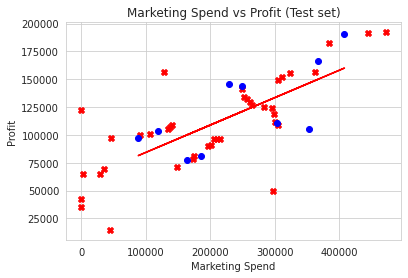

In [159]:
plt.scatter(x_train.reshape(-1), y_train.reshape(-1), marker='X', color='red')
plt.scatter(x_test.reshape(-1), y_test.reshape(-1), color='blue')
plt.plot(x_test, regressor.predict(x_test), color = 'red')
plt.title(col_name+' vs Profit (Test set)')
plt.xlabel(col_name)
plt.ylabel('Profit')
plt.show()


### Plotting Using Seaborn

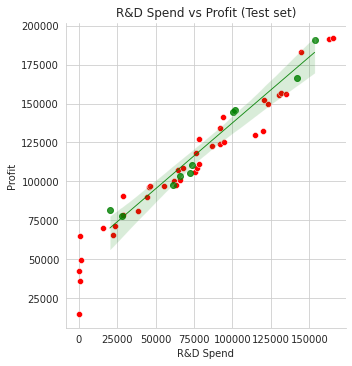

In [223]:
df = np.concatenate((x_test,y_test),1)
# print(df)
df =  pd.DataFrame(df, columns = ["x","y"])
# print(df)
# print(df["x"])
# print(df["y"])
sns.set_style('whitegrid')
sns.relplot(x =np.array(ydf["x"], dtype = float), y = np.array(ydf["y"], dtype = float), data=np.array(ydf, dtype=float), color='r')
sns.regplot(x =np.array(df["x"], dtype = float), y = np.array(df["y"], dtype = float), data=np.array(df, dtype=float), color='g', line_kws={"color":"g","alpha":0.9,"lw":0.9})
plt.title(col_name+' vs Profit (Test set)')
plt.xlabel(col_name)
plt.ylabel('Profit')
plt.show()